### Connect Python to mta_data.db 

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///mta_data.db")
engine

Engine(sqlite:///mta_data.db)

In [3]:
all_tables = engine.table_names()
all_tables

['mta_data']

### Load mta_data from mta_data.db

In [4]:
mta_df = pd.read_sql("SELECT * FROM mta_data;", engine)
mta_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270
...,...,...,...,...,...,...,...,...,...,...,...
10897392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,04:00:00,REGULAR,5554,541
10897393,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,08:00:00,REGULAR,5554,541
10897394,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,12:00:00,REGULAR,5554,541
10897395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,16:00:00,REGULAR,5554,541


In [5]:
type(mta_df)

pandas.core.frame.DataFrame

In [6]:
print(mta_df.shape)

(10897397, 11)


In [7]:
mta_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

### Clean up from unwanted spaces

In [8]:
mta_df.columns = [column.strip() for column in mta_df.columns]  
mta_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
mta_df.rename(columns = {'C/A':'ca' , 'UNIT': 'unit', 'SCP': 'scp', 'STATION': 'station',
                      'LINENAME': 'linename', 'DIVISION': 'division','DATE': 'date',
                    'TIME': 'time', 'DESC': 'desc', 'ENTRIES': 'entries', 'EXITS': 'exits'}, inplace = True)

In [10]:
mta_df.dtypes

ca          object
unit        object
scp         object
station     object
linename    object
division    object
date        object
time        object
desc        object
entries      int64
exits        int64
dtype: object

### Take the date and time fields into a single datetime column


In [11]:
mta_df["date_time"] = pd.to_datetime(mta_df.date + " " + mta_df.time, 
                                            format="%m/%d/%Y %H:%M:%S")
mta_df

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023,2021-12-18 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
10897392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,04:00:00,REGULAR,5554,541,2021-01-01 04:00:00
10897393,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,08:00:00,REGULAR,5554,541,2021-01-01 08:00:00
10897394,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,12:00:00,REGULAR,5554,541,2021-01-01 12:00:00
10897395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,16:00:00,REGULAR,5554,541,2021-01-01 16:00:00


In [12]:
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897397 entries, 0 to 10897396
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   ca         object        
 1   unit       object        
 2   scp        object        
 3   station    object        
 4   linename   object        
 5   division   object        
 6   date       object        
 7   time       object        
 8   desc       object        
 9   entries    int64         
 10  exits      int64         
 11  date_time  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 997.7+ MB


In [13]:
mta_df.date.value_counts().sort_index()

01/01/2021    30696
01/02/2021    30595
01/03/2021    29807
01/04/2021    29779
01/05/2021    29802
              ...  
12/27/2020    29971
12/28/2020    30150
12/29/2020    29877
12/30/2020    29953
12/31/2020    29976
Name: date, Length: 364, dtype: int64

### Get rid of the duplicate entry

In [14]:
mta_df.sort_values(['ca', 'unit', 'scp', 'station'], inplace = True, ascending = False)
mta_df

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
210342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,00:00:00,REGULAR,5562,960,2021-12-18 00:00:00
210343,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,04:00:00,REGULAR,5562,960,2021-12-18 04:00:00
210344,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,08:00:00,REGULAR,5562,960,2021-12-18 08:00:00
210345,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,12:00:00,REGULAR,5562,960,2021-12-18 12:00:00
210346,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,16:00:00,REGULAR,5562,963,2021-12-18 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
10687002,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,2558789,2021-01-01 07:00:00
10687003,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,2558813,2021-01-01 11:00:00
10687004,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,2558831,2021-01-01 15:00:00
10687005,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,2558857,2021-01-01 19:00:00


In [15]:
mta_df.shape

(10897397, 12)

In [16]:
mta_df.drop_duplicates(subset=["ca", "unit", "scp", "station", "date_time"], inplace=True)
mta_df.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
210342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,00:00:00,REGULAR,5562,960,2021-12-18 00:00:00
210343,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,04:00:00,REGULAR,5562,960,2021-12-18 04:00:00
210344,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,08:00:00,REGULAR,5562,960,2021-12-18 08:00:00
210345,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,12:00:00,REGULAR,5562,960,2021-12-18 12:00:00
210346,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/18/2021,16:00:00,REGULAR,5562,963,2021-12-18 16:00:00


In [17]:
mta_df.isnull().values.any() #checking for NaN values

False

In [18]:
mta_df.isnull().sum().sum()


0

In [19]:
mta_df.shape #307 duplicate rows

(10897090, 12)

### Verify that "ca", "unit", "scp", "station", "datetime" is unique

In [20]:
(mta_df
 .groupby(["ca", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)

,ca,unit,scp,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2020-12-26 03:00:00,1
7264720,R139,R031,04-00-00,34 ST-PENN STA,2021-10-16 00:00:00,1
7264722,R139,R031,04-00-00,34 ST-PENN STA,2021-10-16 08:00:00,1
7264723,R139,R031,04-00-00,34 ST-PENN STA,2021-10-16 12:00:00,1
7264724,R139,R031,04-00-00,34 ST-PENN STA,2021-10-16 16:00:00,1


In [21]:
mask = ((mta_df["ca"] == "A002") & 
(mta_df["unit"] == "R051") & 
(mta_df["scp"] == "02-00-00") & 
(mta_df["station"] == "59 ST") &
(mta_df["date_time"].dt.date == datetime.datetime(2020, 12, 26).date()))

mta_df[mask].head()

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
10686964,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,2020-12-26 03:00:00
10686965,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00
10686966,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00
10686967,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00
10686968,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00


All the entries are unigue (entries = 1) 

In [22]:
mta_df.desc.value_counts()

REGULAR       10851050
RECOVR AUD       46040
Name: desc, dtype: int64

In [23]:
# Get rid of the duplicate entry
mta_df.sort_values(["ca", "unit", "scp", "station", "date_time"], 
                          inplace=True, ascending=False)


In [24]:
mta_df.shape

(10897090, 12)

In [25]:
mta_df.drop_duplicates(subset=["ca", "unit", "scp", "station", "date_time"], inplace=True)

In [26]:
mta_df.shape  #no duplicate rows

(10897090, 12)

In [27]:
(mta_df
 .groupby(["ca", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)

,ca,unit,scp,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2020-12-26 03:00:00,1
7264720,R139,R031,04-00-00,34 ST-PENN STA,2021-10-16 00:00:00,1
7264722,R139,R031,04-00-00,34 ST-PENN STA,2021-10-16 08:00:00,1
7264723,R139,R031,04-00-00,34 ST-PENN STA,2021-10-16 12:00:00,1
7264724,R139,R031,04-00-00,34 ST-PENN STA,2021-10-16 16:00:00,1


No duplicate entries, we can move on. 

In [28]:
# Drop Desc Column. To prevent errors in multiple run of cell, errors on drop is ignored
mta_df = mta_df.drop(["DESC"], axis=1, errors="ignore")

- Obtaining the maximum `entries` value for each day, for each unique turnstile.

In [29]:
mta_df[(mta_df["ca"] == "A002") & 
(mta_df["unit"] == "R051") & 
(mta_df["scp"] == "02-00-00") & 
(mta_df["station"] == "59 ST") &
(mta_df["date"] == "12/26/2020")]


,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
10686969,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,2020-12-26 23:00:00
10686968,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00
10686967,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00
10686966,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00
10686965,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00
10686964,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,2020-12-26 03:00:00


In [30]:
daily_turnstile_entries = (mta_df
                        .groupby(["ca", "unit", "scp", "station", "date"],as_index=False)
                        .entries.first())


In [31]:
daily_turnstile_entries.head()

,ca,unit,scp,station,date,entries
0,A002,R051,02-00-00,59 ST,01/01/2021,7511647
1,A002,R051,02-00-00,59 ST,01/02/2021,7511996
2,A002,R051,02-00-00,59 ST,01/03/2021,7512214
3,A002,R051,02-00-00,59 ST,01/04/2021,7512754
4,A002,R051,02-00-00,59 ST,01/05/2021,7513300


- Obtaining the maximum `exits` value for each day, for each unique turnstile.

In [32]:
daily_turnstile_exits = (mta_df
                        .groupby(["ca", "unit", "scp", "station", "date"],as_index=False)
                        .exits.first())

In [33]:
daily_turnstile_exits.head()

,ca,unit,scp,station,date,exits
0,A002,R051,02-00-00,59 ST,01/01/2021,2558865
1,A002,R051,02-00-00,59 ST,01/02/2021,2559007
2,A002,R051,02-00-00,59 ST,01/03/2021,2559091
3,A002,R051,02-00-00,59 ST,01/04/2021,2559328
4,A002,R051,02-00-00,59 ST,01/05/2021,2559580


- Use daily maximum `ENTRIES` and daily maximun `EXITS` figures to calculate **daily entries** and  **daily exits**, above shows cumulative entries.

In [34]:
daily_turnstile_entries[["prev_date", "prev_entries"]] = (daily_turnstile_entries
                                                       .groupby(["ca", "unit", "scp", "station"])["date", "entries"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/82/v_s_l3zd73l4xd416qr4dry83khty1/T/ipykernel_72171/644787417.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_turnstile_entries[["prev_date", "prev_entries"]] = (daily_turnstile_entries


In [35]:
daily_turnstile_entries.head()


,ca,unit,scp,station,date,entries,prev_date,prev_entries
0,A002,R051,02-00-00,59 ST,01/01/2021,7511647,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2021,7511996,01/01/2021,7511647.0
2,A002,R051,02-00-00,59 ST,01/03/2021,7512214,01/02/2021,7511996.0
3,A002,R051,02-00-00,59 ST,01/04/2021,7512754,01/03/2021,7512214.0
4,A002,R051,02-00-00,59 ST,01/05/2021,7513300,01/04/2021,7512754.0


In [36]:
# Drop the rows for the earliest date in the df
daily_turnstile_entries.dropna(subset=["prev_date"], axis=0, inplace=True)

In [37]:
daily_turnstile_entries[daily_turnstile_entries["entries"] < daily_turnstile_entries["prev_entries"]].head()

,ca,unit,scp,station,date,entries,prev_date,prev_entries
358,A002,R051,02-00-00,59 ST,12/26/2020,7508852,12/24/2021,7674631.0
722,A002,R051,02-00-01,59 ST,12/26/2020,6657381,12/24/2021,6787885.0
1086,A002,R051,02-03-00,59 ST,12/26/2020,1406853,12/24/2021,1476547.0
1450,A002,R051,02-03-01,59 ST,12/26/2020,1530124,12/24/2021,1708751.0
1536,A002,R051,02-03-02,59 ST,03/22/2021,238,03/21/2021,6641395.0


In [38]:
# reverse counter
mask = ((mta_df["ca"] == "A002") & 
(mta_df["unit"] == "R051") & 
(mta_df["scp"] == "02-00-00") & 
(mta_df["station"] == "59 ST") &
(mta_df["date_time"].dt.date == datetime.datetime(2021, 12, 24).date()))
mta_df[mask].head()

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,23:00:00,REGULAR,7674631,2647620,2021-12-24 23:00:00
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,19:00:00,REGULAR,7674621,2647606,2021-12-24 19:00:00
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,15:00:00,REGULAR,7674550,2647550,2021-12-24 15:00:00
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,11:00:00,REGULAR,7674499,2647507,2021-12-24 11:00:00
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,07:00:00,REGULAR,7674488,2647381,2021-12-24 07:00:00


In [39]:
# Checking how many stations have this issue.

(daily_turnstile_entries[daily_turnstile_entries["entries"] < daily_turnstile_entries["prev_entries"]]
    .groupby(["ca", "unit", "scp", "station"])
    .size())

ca     unit  scp       station      
A002   R051  02-00-00  59 ST            1
             02-00-01  59 ST            1
             02-03-00  59 ST            1
             02-03-01  59 ST            1
             02-03-02  59 ST            1
                                       ..
TRAM2  R469  00-00-01  RIT-ROOSEVELT    1
             00-03-00  RIT-ROOSEVELT    1
             00-03-01  RIT-ROOSEVELT    1
             00-05-00  RIT-ROOSEVELT    2
             00-05-01  RIT-ROOSEVELT    1
Length: 4799, dtype: int64

In [40]:
def get_daily_counts(row, max_counter):
    counter = row["entries"] - row["prev_entries"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["entries"], row["prev_entries"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = daily_turnstile_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

238 6641395.0
6612907 123760.0
52806 17116894.0
17109949 166678.0
3082 1390173.0
1387887 96066.0
50 5264647.0
5240712 22160.0
18 4340953.0
4319382 21659.0
117 11715665.0
11675657 237421.0
198 5102094.0
5097487 126065.0
738 18398229.0
18244337 509945.0
327680 185586773.0
185582333 292954.0
6 5597786.0
5552756 860.0
233 1951349.0
1922624 5795.0
169 2172444.0
2170809 88928.0
3039842 73028.0
43 3039842.0
14 1028362.0
1021429 20940.0
25 1400020.0
1397677 3129.0
127 1657032.0
1650304 83807.0
327680 756269765.0
756204782 144965.0
262152 553649999.0
553649927 762.0
262152 229572623.0
229572623 262152.0
353 8049630.0
7883237 148942.0
0 5309746.0
5309736 199.0
80 1640812.0
3472083 42650.0
128 1458351.0
1388344 16571.0
327834 2642486.0
2620914 575951.0
101 2651127.0
2640146 52474.0
104 17275602.0
17253837 41742.0
16796392 123975.0
123940 16798085.0
453044031 1779426.0
24 453053819.0
1779111 2045.0
1562967890 113672.0
48740 1562963009.0
167790157 702266.0
643771 167827245.0
63 9631506.0
9485741 25

In [41]:
def get_daily_counts(row, max_counter):
    counter = row["entries"] - row["prev_entries"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["entries"], row["prev_entries"])
        counter = min(row["entries"], row["prev_entries"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
daily_turnstile_entries["daily_entries"] = daily_turnstile_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

238 6641395.0
6612907 123760.0
52806 17116894.0
17109949 166678.0
3082 1390173.0
1387887 96066.0
50 5264647.0
5240712 22160.0
18 4340953.0
4319382 21659.0
117 11715665.0
11675657 237421.0
198 5102094.0
5097487 126065.0
738 18398229.0
18244337 509945.0
327680 185586773.0
185582333 292954.0
6 5597786.0
5552756 860.0
233 1951349.0
1922624 5795.0
169 2172444.0
2170809 88928.0
3039842 73028.0
43 3039842.0
14 1028362.0
1021429 20940.0
25 1400020.0
1397677 3129.0
127 1657032.0
1650304 83807.0
327680 756269765.0
756204782 144965.0
262152 553649999.0
553649927 762.0
262152 229572623.0
229572623 262152.0
353 8049630.0
7883237 148942.0
0 5309746.0
5309736 199.0
80 1640812.0
3472083 42650.0
128 1458351.0
1388344 16571.0
327834 2642486.0
2620914 575951.0
101 2651127.0
2640146 52474.0
104 17275602.0
17253837 41742.0
16796392 123975.0
123940 16798085.0
453044031 1779426.0
24 453053819.0
1779111 2045.0
1562967890 113672.0
48740 1562963009.0
167790157 702266.0
643771 167827245.0
63 9631506.0
9485741 25

In [42]:
daily_turnstile_entries.head()

,ca,unit,scp,station,date,entries,prev_date,prev_entries,daily_entries
1,A002,R051,02-00-00,59 ST,01/02/2021,7511996,01/01/2021,7511647.0,349.0
2,A002,R051,02-00-00,59 ST,01/03/2021,7512214,01/02/2021,7511996.0,218.0
3,A002,R051,02-00-00,59 ST,01/04/2021,7512754,01/03/2021,7512214.0,540.0
4,A002,R051,02-00-00,59 ST,01/05/2021,7513300,01/04/2021,7512754.0,546.0
5,A002,R051,02-00-00,59 ST,01/06/2021,7513790,01/05/2021,7513300.0,490.0


Now lets do the same for daily exits.

In [43]:
daily_turnstile_exits[["prev_date_exits", "prev_exits"]] = (daily_turnstile_exits
                                                       .groupby(["ca", "unit", "scp", "station"])["date", "exits"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/82/v_s_l3zd73l4xd416qr4dry83khty1/T/ipykernel_72171/2923132025.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_turnstile_exits[["prev_date_exits", "prev_exits"]] = (daily_turnstile_exits


In [44]:
daily_turnstile_exits.head()

,ca,unit,scp,station,date,exits,prev_date_exits,prev_exits
0,A002,R051,02-00-00,59 ST,01/01/2021,2558865,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2021,2559007,01/01/2021,2558865.0
2,A002,R051,02-00-00,59 ST,01/03/2021,2559091,01/02/2021,2559007.0
3,A002,R051,02-00-00,59 ST,01/04/2021,2559328,01/03/2021,2559091.0
4,A002,R051,02-00-00,59 ST,01/05/2021,2559580,01/04/2021,2559328.0


In [45]:
# Drop the rows for the earliest date in the df
daily_turnstile_exits.dropna(subset=["prev_date_exits"], axis=0, inplace=True)

In [46]:
daily_turnstile_exits[daily_turnstile_exits["exits"] < daily_turnstile_exits["prev_exits"]].head()

,ca,unit,scp,station,date,exits,prev_date_exits,prev_exits
358,A002,R051,02-00-00,59 ST,12/26/2020,2557704,12/24/2021,2647620.0
722,A002,R051,02-00-01,59 ST,12/26/2020,1508513,12/24/2021,1564328.0
1086,A002,R051,02-03-00,59 ST,12/26/2020,5305553,12/24/2021,5605771.0
1450,A002,R051,02-03-01,59 ST,12/26/2020,2380419,12/24/2021,2697679.0
1536,A002,R051,02-03-02,59 ST,03/22/2021,88,03/21/2021,8869456.0


In [47]:
# reverse counter
mask = ((mta_df["ca"] == "A002") & 
(mta_df["unit"] == "R051") & 
(mta_df["scp"] == "02-00-00") & 
(mta_df["station"] == "59 ST") &
(mta_df["date_time"].dt.date == datetime.datetime(2021, 12, 24).date()))
mta_df[mask].head()

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,23:00:00,REGULAR,7674631,2647620,2021-12-24 23:00:00
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,19:00:00,REGULAR,7674621,2647606,2021-12-24 19:00:00
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,15:00:00,REGULAR,7674550,2647550,2021-12-24 15:00:00
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,11:00:00,REGULAR,7674499,2647507,2021-12-24 11:00:00
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2021,07:00:00,REGULAR,7674488,2647381,2021-12-24 07:00:00


In [48]:
# Checking how many stations have this issue.

(daily_turnstile_exits[daily_turnstile_exits["exits"] < daily_turnstile_exits["prev_exits"]]
    .groupby(["ca", "unit", "scp", "station"])
    .size())

ca     unit  scp       station      
A002   R051  02-00-00  59 ST            1
             02-00-01  59 ST            1
             02-03-00  59 ST            1
             02-03-01  59 ST            1
             02-03-02  59 ST            1
                                       ..
TRAM2  R469  00-00-01  RIT-ROOSEVELT    1
             00-03-00  RIT-ROOSEVELT    1
             00-03-01  RIT-ROOSEVELT    1
             00-05-00  RIT-ROOSEVELT    2
             00-05-01  RIT-ROOSEVELT    1
Length: 4779, dtype: int64

In [49]:
def get_daily_counts_exits(row, max_counter):
    counter = row["exits"] - row["prev_exits"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["exits"], row["prev_exits"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = daily_turnstile_exits.apply(get_daily_counts_exits, axis=1, max_counter=1000000)

88 8869456.0
8828255 176812.0
45524 18816668.0
18808947 232113.0
85 5980618.0
5950976 53204.0
184 29823169.0
29714024 782313.0
54 1719658.0
1718126 55422.0
295 7504407.0
7397133 350445.0
65540 17295986.0
17293464 17701.0
1 8162609.0
8053237 2119.0
1329 4753462.0
4505378 31007.0
74 1717529.0
1715617 51978.0
2113917 100832.0
46 2113917.0
218 1653807.0
1619576 88250.0
104 436767770.0
436726129 85824.0
0 469762048.0
469762048 0.0
8 763625201.0
763625236 120.0
165 2357391.0
2318296 35831.0
0 3196184.0
3196184 0.0
5758166 1966977.0
11 5758421.0
1962930 29859.0
137 2192493.0
2176699 78964.0
161 1075170.0
268439877 1060617.0
11 268452929.0
1060305 2873.0
1562963755 1362410.0
702247 1562899376.0
268473848 1083083.0
931304 268594515.0
75 1318622.0
1268846 29727.0
116 1481691.0
1472045 52859.0
0 1377854.0
1351010 114019.0
19097031 20240784.0
633 2245979.0
2045802 86965.0
1 1076665.0
1059629 7371.0
694 5516171.0
5035083 76497.0
100678103 411664.0
1431 100866157.0
65 8512839.0
8422401 66624.0
6 105

In [50]:
def get_daily_counts_exits(row, max_counter):
    counter = row["exits"] - row["prev_exits"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["exits"], row["prev_exits"])
        counter = min(row["exits"], row["prev_exits"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
daily_turnstile_exits["daily_exits"] = daily_turnstile_exits.apply(get_daily_counts_exits, axis=1, max_counter=1000000)

88 8869456.0
8828255 176812.0
45524 18816668.0
18808947 232113.0
85 5980618.0
5950976 53204.0
184 29823169.0
29714024 782313.0
54 1719658.0
1718126 55422.0
295 7504407.0
7397133 350445.0
65540 17295986.0
17293464 17701.0
1 8162609.0
8053237 2119.0
1329 4753462.0
4505378 31007.0
74 1717529.0
1715617 51978.0
2113917 100832.0
46 2113917.0
218 1653807.0
1619576 88250.0
104 436767770.0
436726129 85824.0
0 469762048.0
469762048 0.0
8 763625201.0
763625236 120.0
165 2357391.0
2318296 35831.0
0 3196184.0
3196184 0.0
5758166 1966977.0
11 5758421.0
1962930 29859.0
137 2192493.0
2176699 78964.0
161 1075170.0
268439877 1060617.0
11 268452929.0
1060305 2873.0
1562963755 1362410.0
702247 1562899376.0
268473848 1083083.0
931304 268594515.0
75 1318622.0
1268846 29727.0
116 1481691.0
1472045 52859.0
0 1377854.0
1351010 114019.0
19097031 20240784.0
633 2245979.0
2045802 86965.0
1 1076665.0
1059629 7371.0
694 5516171.0
5035083 76497.0
100678103 411664.0
1431 100866157.0
65 8512839.0
8422401 66624.0
6 105

In [51]:
daily_turnstile_exits.head()

,ca,unit,scp,station,date,exits,prev_date_exits,prev_exits,daily_exits
1,A002,R051,02-00-00,59 ST,01/02/2021,2559007,01/01/2021,2558865.0,142.0
2,A002,R051,02-00-00,59 ST,01/03/2021,2559091,01/02/2021,2559007.0,84.0
3,A002,R051,02-00-00,59 ST,01/04/2021,2559328,01/03/2021,2559091.0,237.0
4,A002,R051,02-00-00,59 ST,01/05/2021,2559580,01/04/2021,2559328.0,252.0
5,A002,R051,02-00-00,59 ST,01/06/2021,2559817,01/05/2021,2559580.0,237.0


Now we look on **turnstile** level `entries` and `exits`.

In [52]:
ca_unit_station_daily_entries = daily_turnstile_entries.groupby(["ca", "unit", "station", "date"])[['daily_entries']].sum().reset_index()
ca_unit_station_daily_entries.head()

,ca,unit,station,date,daily_entries
0,A002,R051,59 ST,01/02/2021,2475.0
1,A002,R051,59 ST,01/03/2021,1674.0
2,A002,R051,59 ST,01/04/2021,4389.0
3,A002,R051,59 ST,01/05/2021,4346.0
4,A002,R051,59 ST,01/06/2021,4290.0


In [53]:
ca_unit_station_daily_exits = daily_turnstile_exits.groupby(["ca", "unit", "station", "date"])[['daily_exits']].sum().reset_index()
ca_unit_station_daily_exits.head()

,ca,unit,station,date,daily_exits
0,A002,R051,59 ST,01/02/2021,1975.0
1,A002,R051,59 ST,01/03/2021,1381.0
2,A002,R051,59 ST,01/04/2021,3420.0
3,A002,R051,59 ST,01/05/2021,3475.0
4,A002,R051,59 ST,01/06/2021,3575.0


Now we look on **station** level `entries` and `exits`.

In [54]:
station_daily_entries = daily_turnstile_entries.groupby(["station", "date"])[['daily_entries']].sum().reset_index()
station_daily_entries.head()

,station,date,daily_entries
0,1 AV,01/02/2021,3673.0
1,1 AV,01/03/2021,2547.0
2,1 AV,01/04/2021,5303.0
3,1 AV,01/05/2021,5468.0
4,1 AV,01/06/2021,5603.0


In [55]:
station_daily_exits = daily_turnstile_exits.groupby(["station", "date"])[['daily_exits']].sum().reset_index()
station_daily_exits.head()

,station,date,daily_exits
0,1 AV,01/02/2021,6054.0
1,1 AV,01/03/2021,4537.0
2,1 AV,01/04/2021,8145.0
3,1 AV,01/05/2021,8332.0
4,1 AV,01/06/2021,8532.0


At station 1 AV the exits numbers are higher than entries, and this is reversed at the turnstile level but at different station.
As long as station level is consistent this seems to be logical, some stations can have higher exits than entries and reverse.

Now look into the whole time series. 

In [56]:
station_totals_entries = station_daily_entries.groupby('station').sum()\
    .sort_values('daily_entries', ascending=False)\
    .reset_index()

station_totals_entries.head(10)

,station,daily_entries
0,34 ST-PENN STA,32098577.0
1,34 ST-HERALD SQ,24485888.0
2,86 ST,24223514.0
3,FULTON ST,22469215.0
4,GRD CNTRL-42 ST,22327112.0
5,23 ST,21013311.0
6,42 ST-PORT AUTH,19954700.0
7,125 ST,19917080.0
8,14 ST-UNION SQ,19217353.0
9,TIMES SQ-42 ST,18218556.0


In [57]:
station_totals_exits = station_daily_exits.groupby('station').sum()\
    .sort_values('daily_exits', ascending=False)\
    .reset_index()

station_totals_exits.head(10)

,station,daily_exits
0,34 ST-PENN STA,41144467.0
1,34 ST-HERALD SQ,32009202.0
2,GRD CNTRL-42 ST,28796212.0
3,14 ST-UNION SQ,27909862.0
4,86 ST,26989886.0
5,125 ST,26020076.0
6,FULTON ST,24642105.0
7,23 ST,24341707.0
8,TIMES SQ-42 ST,23060408.0
9,42 ST-PORT AUTH,22904991.0


Now plotting top busiest daily entries and exits.

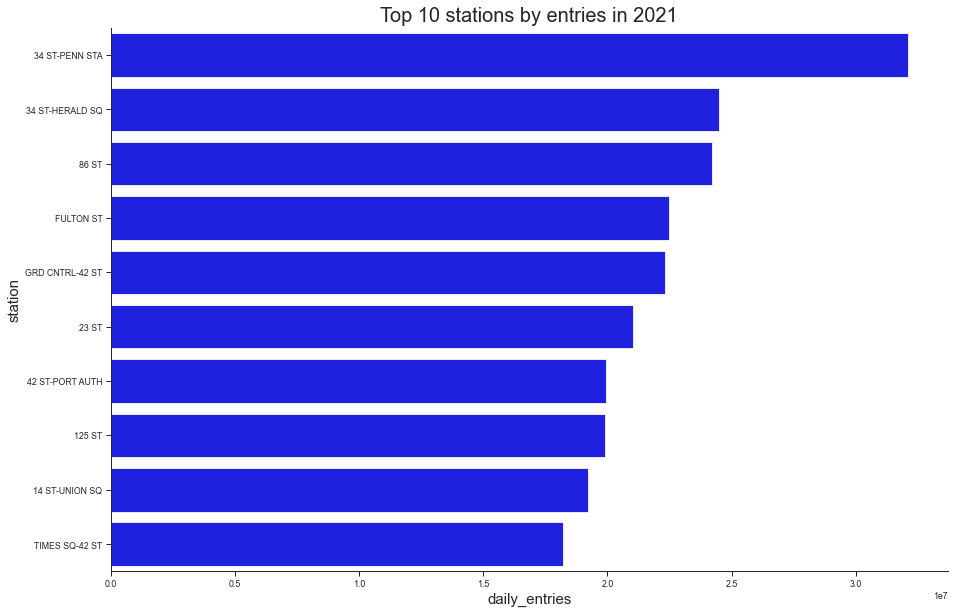

In [61]:
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20, "axes.labelsize":15})
plt.figure(figsize=(15,10))

sns.barplot(data = station_totals_entries.head(10),
            x = 'daily_entries',
            y = 'station',
            #palette = 'Greens',
            color = 'blue'
            ).set(title = "Top 10 stations by entries in 2021")
sns.despine();
plt.savefig("fig1.png")

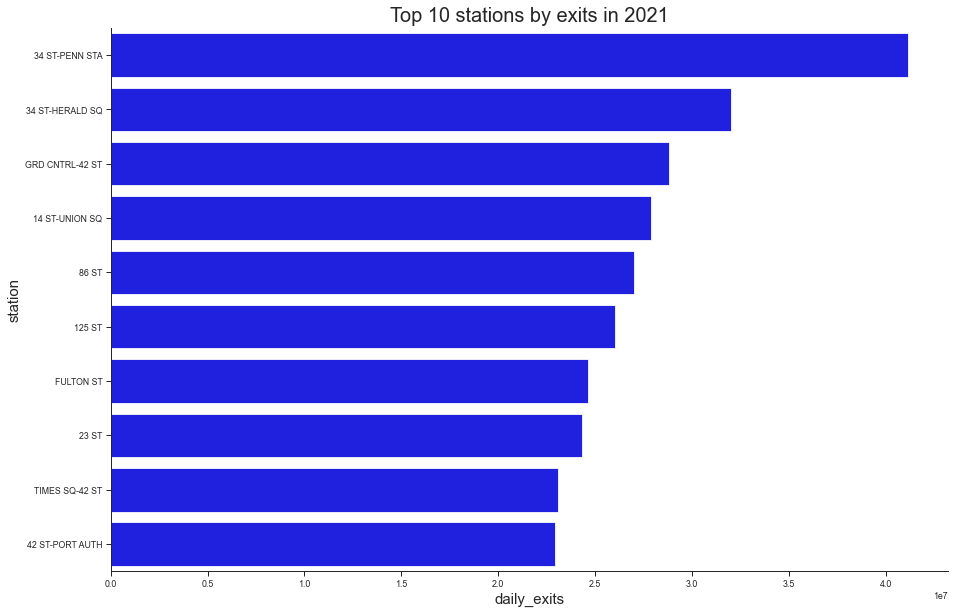

In [62]:
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20, "axes.labelsize":15})
plt.figure(figsize=(15,10))

sns.barplot(data = station_totals_exits.head(10),
            x = 'daily_exits',
            y = 'station',
            #palette = 'Greens',
            color = 'blue'
            ).set(title = "Top 10 stations by exits in 2021")
sns.despine();
plt.savefig("fig2.png")

In [66]:
exits_10 = station_totals_exits.head(10)
entries_10 = station_totals_entries.head(10)
combined_df = pd.concat([exits_10, entries_10], axis=1, join='inner')
combined_df

,station,daily_exits,station,daily_entries
0,34 ST-PENN STA,41144467.0,34 ST-PENN STA,32098577.0
1,34 ST-HERALD SQ,32009202.0,34 ST-HERALD SQ,24485888.0
2,GRD CNTRL-42 ST,28796212.0,86 ST,24223514.0
3,14 ST-UNION SQ,27909862.0,FULTON ST,22469215.0
4,86 ST,26989886.0,GRD CNTRL-42 ST,22327112.0
5,125 ST,26020076.0,23 ST,21013311.0
6,FULTON ST,24642105.0,42 ST-PORT AUTH,19954700.0
7,23 ST,24341707.0,125 ST,19917080.0
8,TIMES SQ-42 ST,23060408.0,14 ST-UNION SQ,19217353.0
9,42 ST-PORT AUTH,22904991.0,TIMES SQ-42 ST,18218556.0


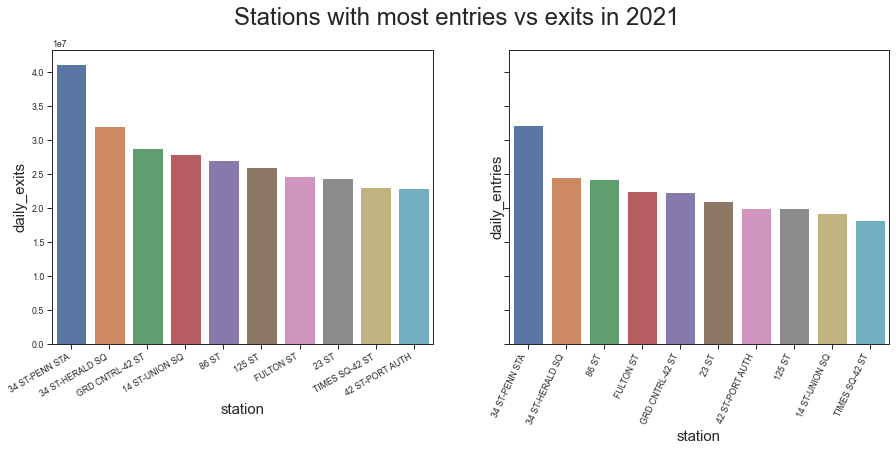

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
fig.suptitle('Stations with most entries vs exits in 2021')
sns.set_theme(style="whitegrid")
# Exits
sns.barplot(ax=axes[0], x=exits_10.station, y=exits_10.daily_exits)
axes[0].set_title('')
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=45)
plt.xticks(rotation=65, horizontalalignment='right')
fig.autofmt_xdate()


# Entries
sns.barplot(ax=axes[1], x=entries_10.station, y=entries_10.daily_entries)
axes[1].set_title('')
plt.xticks(rotation=65, horizontalalignment='right')
plt.savefig("fig3.png")

#sns.despine(bottom=True)

DATA VISUALIZATION

Mapping top stations with geo locations

In [67]:
mapp_location = {
    'station': ['34 ST-PENN STA', '34 ST-HERALD SQ', '86 ST', 'FULTON ST', 'GRD CNTRL-42 ST', '23 ST',
               '42 ST-PORT AUTH', '125 ST', '14 ST-UNION SQ', 'TIMES SQ-42 ST' ],
    'latitude': ['40.75037300003949', '40.74964456009442', '40.77786104333163', '40.68711899950771',
            '40.75180742981634','40.742954317826005', '40.757307998551504', '40.811071672994565', '40.734673000996125', '40.755983000570076'],
    'longitude': ['-73.99105699913983', '-73.9879368338264', '-73.95177090964917', '-73.97537499833149',
            '-73.9767132992584', '-73.99276500471389', '-73.98973500085859', '-73.95224799734774', '-73.98995099881881', '-73.98622899953202']}




In [68]:
geo_location = pd.DataFrame(mapp_location)
geo_location

,station,latitude,longitude
0,34 ST-PENN STA,40.75037300003949,-73.99105699913983
1,34 ST-HERALD SQ,40.74964456009442,-73.9879368338264
2,86 ST,40.77786104333163,-73.95177090964917
3,FULTON ST,40.68711899950771,-73.97537499833149
4,GRD CNTRL-42 ST,40.75180742981634,-73.9767132992584
5,23 ST,40.742954317826005,-73.99276500471389
6,42 ST-PORT AUTH,40.757307998551504,-73.98973500085859
7,125 ST,40.811071672994565,-73.95224799734774
8,14 ST-UNION SQ,40.734673000996125,-73.98995099881881
9,TIMES SQ-42 ST,40.755983000570076,-73.98622899953202


In [69]:
station_totals_entries_geo = pd.merge(station_totals_entries, geo_location, on='station', how='left')

station_entries_top_10 = station_totals_entries_geo.head(10)

In [70]:
import plotly.express as px

In [71]:
# change from object to numeric
geo_location["longitude"] = pd.to_numeric(geo_location["longitude"])
geo_location["latitude"] = pd.to_numeric(geo_location["latitude"])
geo_location

,station,latitude,longitude
0,34 ST-PENN STA,40.750373,-73.991057
1,34 ST-HERALD SQ,40.749645,-73.987937
2,86 ST,40.777861,-73.951771
3,FULTON ST,40.687119,-73.975375
4,GRD CNTRL-42 ST,40.751807,-73.976713
5,23 ST,40.742954,-73.992765
6,42 ST-PORT AUTH,40.757308,-73.989735
7,125 ST,40.811072,-73.952248
8,14 ST-UNION SQ,40.734673,-73.989951
9,TIMES SQ-42 ST,40.755983,-73.986229


In [72]:
geo_location["longitude"] = pd.to_numeric(geo_location["longitude"])
geo_location["latitude"] = pd.to_numeric(geo_location["latitude"])

In [73]:
px.set_mapbox_access_token(open(".mapbox_token").read())

In [127]:
fig = px.scatter_mapbox(data_frame=station_entries_top_10, lat='latitude', lon='longitude', 
  opacity=0.9, 
  hover_name="station", 
  hover_data=["station"], 
  mapbox_style="carto-positron",
  size = "daily_entries",
  size_max = 17,
  color = "station",
  color_continuous_scale=px.colors.sequential.Rainbow,
  zoom=11, center={"lat": 40.777, "lon": -73.951})
fig.update_layout(title = "Top 10 NYC metro stations in 2021",
        #margin={"r":0,"t":0,"l":0,"b":0},
        hoverlabel=dict( 
        bgcolor="white",     # white background
        font_size=16,        # label font size
        font_family="Inter") # label font
)
fig.show()


## Showing weekend trends at Penn ST

In [107]:
mta_df = pd.read_sql("SELECT * FROM mta_data WHERE STATION LIKE '34 ST-P%' limit 1;", engine)
mta_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,12/18/2021,03:00:00,REGULAR,324365,938731


In [83]:
station_daily_34_penn = station_daily_entries[station_daily_entries['station'] == '34 ST-PENN STA']
station_daily_34_penn.head(5)

,station,date,daily_entries
22135,34 ST-PENN STA,01/02/2021,18490.0
22136,34 ST-PENN STA,01/03/2021,13237.0
22137,34 ST-PENN STA,01/04/2021,31215.0
22138,34 ST-PENN STA,01/05/2021,31299.0
22139,34 ST-PENN STA,01/06/2021,31307.0


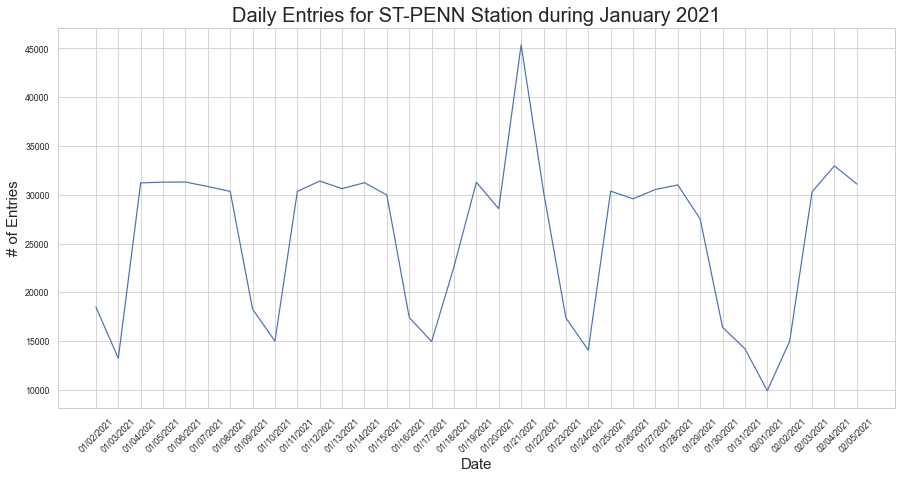

In [84]:
plt.figure(figsize=(15,7))
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20, "axes.labelsize":15})
plt.plot(station_daily_34_penn['date'].head(35), station_daily_34_penn['daily_entries'].head(35))
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for ST-PENN Station during January 2021')
plt.savefig("fig4.png")

## day of the week entries, weekend trends

In [95]:
mta_df = pd.read_sql("SELECT * FROM mta_data WHERE STATION LIKE '86 ST%' limit 1;", engine)
mta_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,C025,R215,00-00-00,86 ST,R,BMT,12/18/2021,03:00:00,REGULAR,64538,131992


In [96]:
station_daily_st_herald = station_daily_entries[station_daily_entries['station'] == '34 ST-HERALD SQ']
station_daily_86_st = station_daily_entries[station_daily_entries['station'] == '86 ST']
station_daily_fulton_st = station_daily_entries[station_daily_entries['station'] == 'FULTON ST']
station_daily_grd_central = station_daily_entries[station_daily_entries['station'] == 'GRD CNTRL-42 ST']
station_daily_23_st = station_daily_entries[station_daily_entries['station'] == '23 ST']
station_daily_42_st = station_daily_entries[station_daily_entries['station'] == '42 ST-PORT AUTH']
station_daily_st_union = station_daily_entries[station_daily_entries['station'] == '14 ST-UNION SQ']
station_daily_125_st = station_daily_entries[station_daily_entries['station'] == '125 ST']
station_daily_time_sq = station_daily_entries[station_daily_entries['station'] == 'TIMES SQ-42 ST']




In [106]:
penn = station_daily_34_penn.head(7)
a = station_daily_st_herald.head(7)
b = station_daily_86_st.head(7)
c = station_daily_fulton_st.head(7)
d = station_daily_grd_central.head(7)
e = station_daily_23_st.head(7)
f = station_daily_42_st.head(7)
g = station_daily_st_union.head(7)
h = station_daily_125_st.head(7)
k = station_daily_time_sq.head(7)


y = [['station_daily_st_herald'], ['station_daily_86_st'], ['station_daily_fulton_st'], 
     ['station_daily_grd_central'], ['station_daily_23_st'], ['station_daily_42_st'],
     ['station_daily_st_union'], ['station_daily_125_st'], ['station_daily_time_sq']]

penn['day_of_week_num'] = pd.to_datetime(penn['date']).dt.dayofweek
penn['week_number'] = pd.to_datetime(penn['date']).dt.week


a['day_of_week_num'] = pd.to_datetime(a['date']).dt.dayofweek
a['week_number'] = pd.to_datetime(a['date']).dt.week

b['day_of_week_num'] = pd.to_datetime(b['date']).dt.dayofweek
b['week_number'] = pd.to_datetime(b['date']).dt.week

c['day_of_week_num'] = pd.to_datetime(c['date']).dt.dayofweek
c['week_number'] = pd.to_datetime(c['date']).dt.week

d['day_of_week_num'] = pd.to_datetime(d['date']).dt.dayofweek
d['week_number'] = pd.to_datetime(d['date']).dt.week

e['day_of_week_num'] = pd.to_datetime(e['date']).dt.dayofweek
e['week_number'] = pd.to_datetime(e['date']).dt.week

f['day_of_week_num'] = pd.to_datetime(f['date']).dt.dayofweek
f['week_number'] = pd.to_datetime(f['date']).dt.week

g['day_of_week_num'] = pd.to_datetime(g['date']).dt.dayofweek
g['week_number'] = pd.to_datetime(g['date']).dt.week

h['day_of_week_num'] = pd.to_datetime(h['date']).dt.dayofweek
h['week_number'] = pd.to_datetime(h['date']).dt.week

k['day_of_week_num'] = pd.to_datetime(k['date']).dt.dayofweek
k['week_number'] = pd.to_datetime(k['date']).dt.week


x = [['a'], ['b'], ['c'], 
     ['d'], ['e'], ['f'],
     ['g'], ['h'], ['k']]

/var/folders/82/v_s_l3zd73l4xd416qr4dry83khty1/T/ipykernel_72171/2532189230.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/82/v_s_l3zd73l4xd416qr4dry83khty1/T/ipykernel_72171/2532189230.py:18: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/var/folders/82/v_s_l3zd73l4xd416qr4dry83khty1/T/ipykernel_72171/2532189230.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/82/v_s_l3zd73l4xd416qr4dry83k

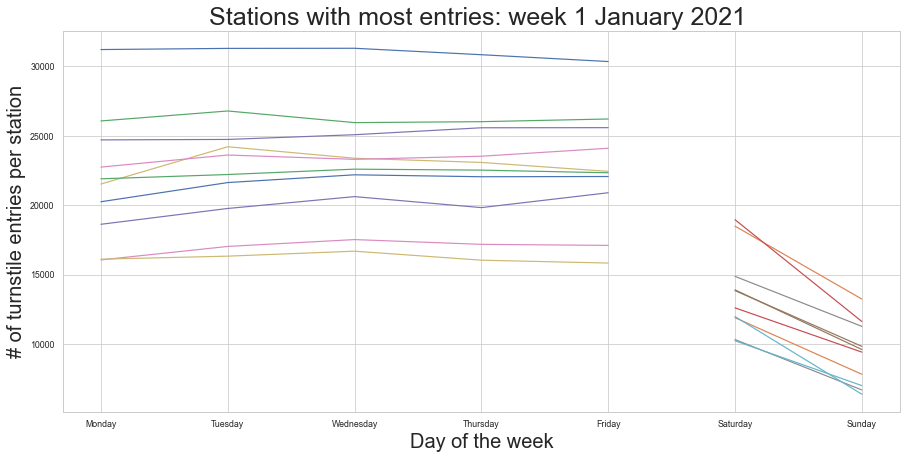

In [126]:
plt.figure(figsize=(15,7))
for i, group in penn.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    
    
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])


for i, group in a.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    

for i, group in b.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    

for i, group in c.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    

for i, group in d.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    


for i, group in e.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    

for i, group in f.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    

for i, group in g.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    

for i, group in h.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    

for i, group in k.head(75).groupby('week_number'):
    plt.plot(group['day_of_week_num'], group['daily_entries'])
    
plt.xlabel('Day of the week')
plt.ylabel('# of turnstile entries per station')
plt.xticks(np.arange(7),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Stations with most entries: week 1 January 2021 ')

    

sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25, "axes.labelsize":20})

plt.savefig("fig5.png")